# Final Project Submission
* Student name: James M. Irivng, Ph.D.
* Student pace: full time
* Scheduled project review date/time: 05/15/19 2:30 pm
* Instructor name: Jeff Herman / Brandon Lewis
* Blog post URL:


# Iowa Prisoner Recidivism

<img src="images/LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=80%>

## Data Source: Iowa Department of Corrections 

- Source: 
    - https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- Original/Up-to-date Source: 
    - https://data.iowa.gov/Correctional-System/3-Year-Recidivism-for-Offenders-Released-from-Pris/mw8r-vqy4
- **Statistics about recidivism in prisoners from a 3 year prisoner**
- **Target:**
    - Recidivism - Return to Prison
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population

### Detailed variable descriptions:

- **Fiscal Year Released**
    - Fiscal year (year ending June 30) for which the offender was released from prison.

- **Recidivism Reporting Year**
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- **Race - Ethnicity**
    - Offender's Race and Ethnicity

- **Convicting Offense Classification**
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- **Convicting Offense Type**
    - General category for the most serious offense for which the offender was placed in prison.

- **Convicting Offense Subtype**
    - Further classification of the most serious offense for which the offender was placed in prison.

- **Release Type**
    - Reasoning for Offender's release from prison.

- **Main Supervising District**
    - The Judicial District supervising the offender for the longest time during the tracking period.

- **Recidivism - Return to Prison**
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period
    
- **Part of Target Population** 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

# USING THE OSEMN MODEL TO GUIDE WORKFLOW

1. **OBTAIN:**
    - [x] Import data, inspect, check for datatypes to convert and null values
<br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
    - [x] Check for missing values 
    - [x] Check for multicollinearity
    - [x] Normalize data (may want to do after some exploring)   
    <br><br>
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [x] Check scales, ranges (df.describe())
    - [x] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform
    - [x] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
    <br><br>

   
4. **FIT AN INITIAL MODEL:** 
    - [x] Assess the model.
        <br><br>
5. **REVISE THE FITTED MODEL**
    - [x] Adjust chosen model and hyper-parameters
    <br><br>
6. **HOLDOUT VALIDATION**
    - [ ] Perform cross-validation
___

# OBTAIN:

#### Using Custom PyPi Package - `fsds`


In [1]:
# !pip install -U fsds
from fsds.imports import *

fsds v0.3.2 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


In [2]:
import matplotlib as mpl
import sklearn

%matplotlib inline
print(mpl.__version__)
print(sklearn.__version__)

3.3.1
0.23.2


In [3]:
## Set Pandas Options
# pd.set_eng_float_format(accuracy=2)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
pd_options = {
    'display.max_rows'    : 200,
    'display.max_info_rows':200,
    'display.max_columns' : 0,
}
[pd.set_option(option, setting) for option, setting in pd_options.items()]


## Set Plot Style
# plt.style.use('seaborn-notebook')
sns.set_context(font_scale=2)

## Suppress Warnings
import warnings
# warnings.filterwarnings('ignore')

In [4]:
%load_ext autoreload
%autoreload 2
import bs_ds_local as bs
import project_functions as ji

##  PROJECT CONTROL BOOLEAN ARGS

In [5]:
## PROJECT CONTROL BOOLS

# Control if run new gridsearch or use previous params
RUN_SEARCHES = True

# Control if data downloaded fresh from Iowa gov api
GET_NEW_DATA = True

## Loading the dataset and removing unrelated columns

In [6]:
if GET_NEW_DATA:
    print('Downloading data from API...')
    url = "https://data.iowa.gov/resource/mw8r-vqy4.csv"
    df = pd.read_csv(url)
    
else:
    print('Using previously saved data...')
    df = pd.read_csv('data/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv')
    
    ## Making snake case column names if using orignal Kaggle dataset
    snake_case_cols = [c.lower().strip().replace(' - ',' ').replace(' ','_') for c in df.columns]

    ## clean up additional changes made to col names
    list_of_updates = [('classification','class'),
                       ('days_to_return','days_return'),
                      ('sub_type','subtype')]
    ## Fix changes in naming scheme
    for current,new in list_of_updates:
        snake_case_cols =[c.replace(current,new) for c in snake_case_cols]
    
    ## Make a renaming map and rename columns
    column_names_map = dict(zip(df.columns,snake_case_cols))
    df.rename(column_names_map,axis=1,inplace=True)
    
df.head()

fiscal_year_released  recidivism_reporting_year main_supervising_district                  release_type  ... new_offense_class new_offense_type new_offense_subtype target_population
0                  2010                       2013                       7JD                        Parole  ...          C Felony             Drug         Trafficking               Yes
1                  2010                       2013                       NaN  Discharged – End of Sentence  ...               NaN              NaN                 NaN                No
2                  2010                       2013                       5JD                        Parole  ...               NaN              NaN                 NaN               Yes
3                  2010                       2013                       6JD                        Parole  ...               NaN              NaN                 NaN               Yes
4                  2010                       2013                       NaN  Discharged – End of Sentence  ...               NaN              NaN                 NaN                No

[5 rows x 17 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   fiscal_year_released       int64  
 1   recidivism_reporting_year  int64  
 2   main_supervising_district  object 
 3   release_type               object 
 4   race_ethnicity             object 
 5   age_at_release             object 
 6   sex                        object 
 7   offense_class              object 
 8   offense_type               object 
 9   offense_subtype            object 
 10  return_to_prison           object 
 11  days_return                float64
 12  recidivism_type            object 
 13  new_offense_class          object 
 14  new_offense_type           object 
 15  new_offense_subtype        object 
 16  target_population          object 
dtypes: float64(1), int64(2), object(14)
memory usage: 132.9+ KB


In [8]:
## Check years included 
df[[c for c in df.columns if 'year' in c]].agg(['min','max'])

fiscal_year_released  recidivism_reporting_year
min                  2010                       2013
max                  2014                       2017

### FEATURE ENGINEERING TO-DO:

- I would like to add more information related to the judicial district. 
- One approach is to match the Judicial Districts to Counties and map crime/pop data for the county to the district.
- List of Counties Served on Ballotpedia:
    - https://ballotpedia.org/Iowa_District_Courts
- FBI Crime report for 2014:
    - https://ucr.fbi.gov/crime-in-the-u.s/2014/preliminary-semiannual-uniform-crime-report-january-june-2014

**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [9]:
## Drop cols related to recivism details 
drop_expr = ['new',"days","recidivism_type","year"]
drop_cols = []
for exp in drop_expr:
    drop_cols.extend([col for col in df.columns if exp in col])
drop_cols

['new_offense_class',
 'new_offense_type',
 'new_offense_subtype',
 'days_return',
 'recidivism_type',
 'fiscal_year_released',
 'recidivism_reporting_year']

In [10]:
## Saving removed columns to merge again after feature engineering (for tableau)
removed_df = df[drop_cols].copy()
removed_df

new_offense_class new_offense_type new_offense_subtype  days_return recidivism_type  fiscal_year_released  recidivism_reporting_year
0            C Felony             Drug         Trafficking       433.00             New                  2010                       2013
1                 NaN              NaN                 NaN       453.00            Tech                  2010                       2013
2                 NaN              NaN                 NaN       832.00            Tech                  2010                       2013
3                 NaN              NaN                 NaN          NaN   No Recidivism                  2010                       2013
4                 NaN              NaN                 NaN       116.00            Tech                  2010                       2013
..                ...              ...                 ...          ...             ...                   ...                        ...
995               NaN              NaN                 NaN          NaN   No Recidivism                  2010                       2013
996               NaN              NaN                 NaN          NaN   No Recidivism                  2010                       2013
997               NaN              NaN                 NaN          NaN   No Recidivism                  2010                       2013
998               NaN              NaN                 NaN          NaN   No Recidivism                  2010                       2013
999          D Felony     Public Order             Weapons      1050.00             New                  2010                       2013

[1000 rows x 7 columns]

In [11]:
df.drop(columns=drop_cols,inplace=True)
df.head()

main_supervising_district                  release_type        race_ethnicity age_at_release   sex offense_class offense_type offense_subtype return_to_prison target_population
0                       7JD                        Parole  Black - Non-Hispanic          25-34  Male      C Felony      Violent         Robbery              Yes               Yes
1                       NaN  Discharged – End of Sentence  White - Non-Hispanic          25-34  Male      D Felony     Property           Theft              Yes                No
2                       5JD                        Parole  White - Non-Hispanic          35-44  Male      B Felony         Drug     Trafficking              Yes               Yes
3                       6JD                        Parole  White - Non-Hispanic          25-34  Male      B Felony        Other  Other Criminal               No               Yes
4                       NaN  Discharged – End of Sentence  Black - Non-Hispanic          35-44  Male      D Felony      Violent         Assault              Yes                No

### Save original names vs short names in column_legend
- then map names onto columns

In [12]:
# ## Replacing columns with short names
# rename_map = {
#     'Fiscal Year Released': 'yr_released',
#     'Recidivism Reporting Year': 'report_year' ,
#     'Main Supervising District': 'supervising_dist' ,
#     'Release Type': 'release_type' ,
#     'Race - Ethnicity': 'race_ethnicity'  ,
#     'Age At Release ':  'age_at_release' ,
#     'Sex':'sex'   ,
#     'Offense Classification': 'offense_class' ,
#     'Offense Type': 'crime_type'  ,
#     'Offense Subtype':  'crime_subtype' ,
#     'Return to Prison': 'recidivist'  ,
#     'Target Population':  'target_pop'
# }

# df = df.rename(rename_map,axis=1)
# df

In [13]:
df.to_csv('data/iowa_recidivism_renamed_2021.csv')

# SCRUB / EXPLORE


In [14]:
## Explore Dtypes and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   main_supervising_district  object
 1   release_type               object
 2   race_ethnicity             object
 3   age_at_release             object
 4   sex                        object
 5   offense_class              object
 6   offense_type               object
 7   offense_subtype            object
 8   return_to_prison           object
 9   target_population          object
dtypes: object(10)
memory usage: 78.2+ KB


In [15]:
import missingno as ms
def column_report(df,perc_null_thresh=5,return_report=False):
    """Returns a dataframe with the following summary information
    for each column in df.
    - Dtype
    - # Unique Entries
    - # Null Values
    - # Non-Null Values
    - % Null Values
    """
    report = pd.DataFrame({
        'nunique':df.nunique(),
        'dtype':df.dtypes, 
        '# Non-Null': df.notnull().sum(),
        '# Nulls': df.isna().sum(),
        '% Nulls':df.isna().sum()/len(df)*100,
        })
    
    report = report.reset_index().rename({'index':'column'},axis=1)
    
    if return_report:
        return report#.round(2)    
    else:
        def style_nulls(v, thresh=perc_null_thresh, props=''):
            return props if v > thresh else None
        s2 = report.style.applymap(style_nulls, props='color:red;',subset=['% Nulls'])\
                        .format(lambda x: f"{x:.2f} %",subset=['% Nulls'])\
                        .set_caption("Column Report")
        display(s2)
    



def nulls_report(df,plot=True):
    nulls= df.isna().sum()
    nulls_only = nulls[nulls>0]
    nulls_only = nulls_only.round(2)
    
    
    if plot:
        with plt.style.context('seaborn-poster'):
            ms.matrix(df,figsize=(10,4))
            plt.show()
        
    print('Columns with Null Values:')
    display(nulls_only)#.style.format(lambda x: f"{x:.2f} %",
#                                                       subset=['%']))

  

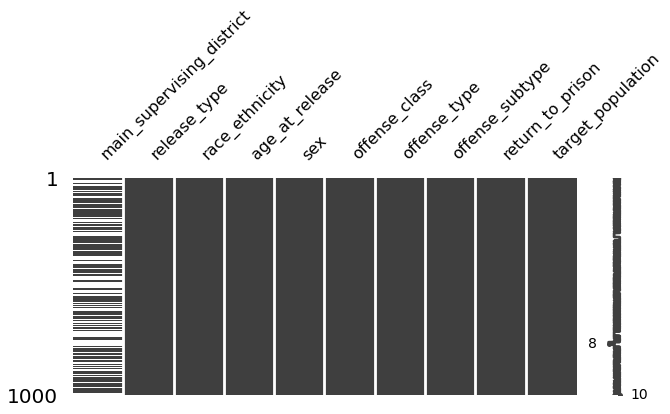

Columns with Null Values:


main_supervising_district    447
release_type                   2
dtype: int64

In [16]:
nulls_report(df)

**Results of Null Check**
<!-- - race_ethnicity has 30 (0.12% of data)
    -  drop
- age_at_release has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop -->
- main_supervising_district has 9581(36.82% of data)
    - replace with "unknown"
- release_type has 1762 (6.77% of data)
    - drop
    
**Dropping all null values from age_at_release, race_ethnicity, and release_type.**

In [17]:
    
column_report(df)

In [18]:
def value_counts(col,dropna=False,normalize=True,sort_index=False,rename=True):
    """Convenience function for display value counts with default params"""
    counts =  col.value_counts(dropna=dropna,normalize=normalize)
    if sort_index:
        counts.sort_index(inplace=True)
        
    if rename:
        counts.name=f'{counts.name}.value_counts(normalized={normalize}, dropna={dropna})'
    return counts

In [19]:
## inspect categories
dashes = '---'*20
for col in df.columns:
    print(dashes)
    print(f"Value Counts for {col}:")
    display(value_counts(df[col],normalize=False,rename=False))
    print()

------------------------------------------------------------
Value Counts for main_supervising_district:


NaN    447
5JD    146
1JD     90
2JD     73
8JD     68
7JD     59
3JD     41
6JD     38
4JD     38
Name: main_supervising_district, dtype: int64


------------------------------------------------------------
Value Counts for release_type:


Parole                          539
Discharged – End of Sentence    445
Special Sentence                 14
NaN                               2
Name: release_type, dtype: int64


------------------------------------------------------------
Value Counts for race_ethnicity:


White - Non-Hispanic                               665
Black - Non-Hispanic                               232
White - Hispanic                                    80
American Indian or Alaska Native - Non-Hispanic     15
Asian or Pacific Islander - Non-Hispanic             5
American Indian or Alaska Native - Hispanic          1
White -                                              1
Black - Hispanic                                     1
Name: race_ethnicity, dtype: int64


------------------------------------------------------------
Value Counts for age_at_release:


25-34           342
35-44           250
45-54           187
Under 25        180
55 and Older     41
Name: age_at_release, dtype: int64


------------------------------------------------------------
Value Counts for sex:


Male      901
Female     99
Name: sex, dtype: int64


------------------------------------------------------------
Value Counts for offense_class:


D Felony                                 426
C Felony                                 273
Aggravated Misdemeanor                   158
Felony - Enhanced                         67
B Felony                                  66
Serious Misdemeanor                        7
Other Felony (Old Code)                    2
Sexual Predator Community Supervision      1
Name: offense_class, dtype: int64


------------------------------------------------------------
Value Counts for offense_type:


Drug            326
Property        316
Violent         223
Public Order    123
Other            12
Name: offense_type, dtype: int64


------------------------------------------------------------
Value Counts for offense_subtype:


Trafficking                        267
Theft                              140
Assault                            113
Burglary                            92
Sex                                 60
Forgery/Fraud                       59
OWI                                 52
Drug Possession                     33
Other Drug                          26
Traffic                             24
Other Violent                       21
Sex Offender Registry/Residency     21
Murder/Manslaughter                 18
Arson                               12
Vandalism                           12
Robbery                             11
Alcohol                             11
Weapons                              9
Other Criminal                       9
Flight/Escape                        5
Special Sentence Revocation          2
Kidnap                               1
Stolen Property                      1
Prostitution/Pimping                 1
Name: offense_subtype, dtype: int64


------------------------------------------------------------
Value Counts for return_to_prison:


No     710
Yes    290
Name: return_to_prison, dtype: int64


------------------------------------------------------------
Value Counts for target_population:


Yes    553
No     447
Name: target_population, dtype: int64

### Notes on Categorical Features

- convert age_at_release to numeric
- Convert return_to_prison and 'target_population' to 0,1

## SIMPLIFYING CATEGORICAL FEATURES

- Use Rare Label Encoding on high cardinality columns:
    - `offsense_subtype`
- Replace bins with numeric values:
    - `age_at_release`

In [20]:
# col = 'offense_subtype'
# ax = df[col].value_counts(1).plot(kind='bar',figsize=(8,4))
# ax.set(ylabel='% of Observations',xlabel='Category',
#        title=f'Value Counts for {col}')
# ax.axhline(.05,c='red',label='5% cutoff')
# ax.legend();

In [21]:
def plot_rare_labels(df,col = 'offense_subtype',
                     thresh=.01,report=True):
    
    ## PLot value counts
    counts = df[col].value_counts(1)
    
    ax = counts.plot(kind='bar',figsize=(8,4))
    ax.set(ylabel='% of Observations',xlabel='Category',
           title=f'Value Counts for {col}')
    ax.axhline(thresh,c='red',label=f'{thresh*100:.2f}% cutoff')
    ax.legend();
    
    ## get list of rare/non-rare
    rare = counts[counts<thresh]
    if report:
        plt.show()
        
        if len(rare)>0:
            print(f'[i] Rare Labels Present in {col}:')
            print(rare)
        else:
            print(f'[i] No Rare Labels Present in {col}.')
        

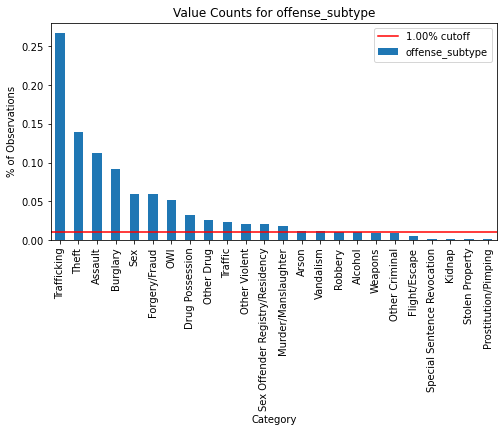

[i] Rare Labels Present in offense_subtype:
Weapons                       0.01
Other Criminal                0.01
Flight/Escape                 0.01
Special Sentence Revocation   0.00
Kidnap                        0.00
Stolen Property               0.00
Prostitution/Pimping          0.00
Name: offense_subtype, dtype: float64


In [22]:
plot_rare_labels(df,col='offense_subtype',thresh=0.01);

### Making `age_at_release` numerical

In [23]:
value_counts(df['age_at_release'])#.value_counts(dropna=False)

25-34          0.34
35-44          0.25
45-54          0.19
Under 25       0.18
55 and Older   0.04
Name: age_at_release.value_counts(normalized=True, dropna=False), dtype: float64

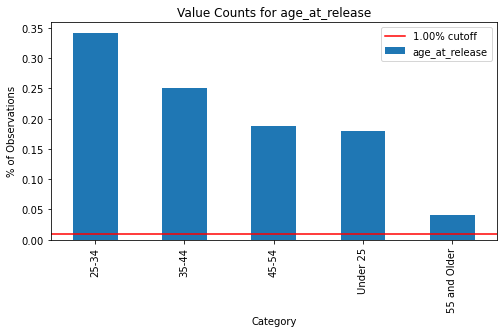

[i] No Rare Labels Present in age_at_release.


In [24]:
plot_rare_labels(df,'age_at_release')

In [25]:
# converting age to numeric feature
age_num_map = {'Under 25':20,
              '25-34':30, 
              '35-44':40,
              '45-54':50,
              '55 and Older':70}
df['age_at_release'] = df['age_at_release'].map(age_num_map)
value_counts(df['age_at_release'])

30   0.34
40   0.25
50   0.19
20   0.18
70   0.04
Name: age_at_release.value_counts(normalized=True, dropna=False), dtype: float64

### df['race_ethnicity']

In [26]:
value_counts(df['race_ethnicity'],normalize=False)

White - Non-Hispanic                               665
Black - Non-Hispanic                               232
White - Hispanic                                    80
American Indian or Alaska Native - Non-Hispanic     15
Asian or Pacific Islander - Non-Hispanic             5
American Indian or Alaska Native - Hispanic          1
White -                                              1
Black - Hispanic                                     1
Name: race_ethnicity.value_counts(normalized=False, dropna=False), dtype: int64

- **Remapping race_ethnicity**
    - Due to the low numbers for several of the race_ethnicity types, reducing and combining Hispanic and Non-Hispanic groups
    - Alternative approach of separating race and ethnicity into 2 separate features was rejected after modeling

In [27]:
# df['race_ethnicity'].unique()

In [28]:
# Defining Dictionary Map for race_ethnicity categories

# race_ethnicity_map = {'White - Non-Hispanic':'White',
#                         'Black - Non-Hispanic': 'Black',
#                         'White - Hispanic' : 'Hispanic',
#                         'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
#                         'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
#                         'Black - Hispanic' : 'Black',
#                         'American Indian or Alaska Native - Hispanic':'American Native',
#                         'White -' : 'White',
#                         'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
#                         'N/A -' : np.nan,
#                         'Black -':'Black'}

race_ethnicity_renamer = {'White -':'White - Non-Hispanic'}

# Replacing original race_ethnicity column with remapped one.
df['race_ethnicity'] = df['race_ethnicity'].replace(race_ethnicity_renamer)
value_counts(df['race_ethnicity'])

White - Non-Hispanic                              0.67
Black - Non-Hispanic                              0.23
White - Hispanic                                  0.08
American Indian or Alaska Native - Non-Hispanic   0.01
Asian or Pacific Islander - Non-Hispanic          0.01
American Indian or Alaska Native - Hispanic       0.00
Black - Hispanic                                  0.00
Name: race_ethnicity.value_counts(normalized=True, dropna=False), dtype: float64

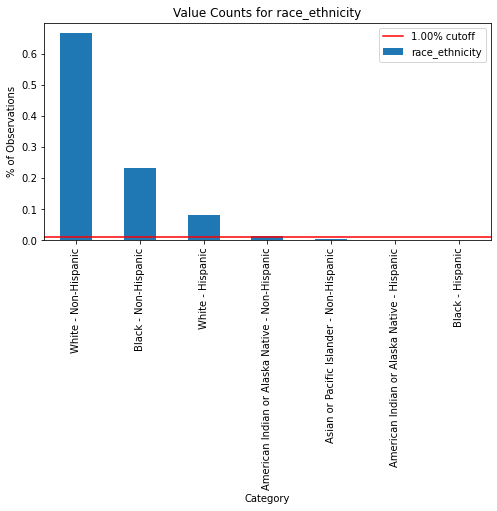

[i] Rare Labels Present in race_ethnicity:
Asian or Pacific Islander - Non-Hispanic      0.01
American Indian or Alaska Native - Hispanic   0.00
Black - Hispanic                              0.00
Name: race_ethnicity, dtype: float64


In [29]:
plot_rare_labels(df,'race_ethnicity')

### df['offense_class']

- **Remapping offense_class**
    - Combine 'Other Felony' and 'Other Felony (Old Code)' -> nan
    - Other Misdemeanor -> np.nan
    - Felony - Mandatory Minimum -> np.nan
    - Special Sentence 2005 -> Sex Offender
    - 'Sexual Predator Community Supervision' -> 'Sex Offender'
    - Other Felony -> np.nan    

In [30]:
value_counts(df['offense_class'])

D Felony                                0.43
C Felony                                0.27
Aggravated Misdemeanor                  0.16
Felony - Enhanced                       0.07
B Felony                                0.07
Serious Misdemeanor                     0.01
Other Felony (Old Code)                 0.00
Sexual Predator Community Supervision   0.00
Name: offense_class.value_counts(normalized=True, dropna=False), dtype: float64

In [31]:
# Remapping
offense_class_map = {'Other Felony (Old Code)':'Other Felony' ,#or other felony
                  'Other Misdemeanor':'Other Misdemeanor',
                   'Felony - Mandatory Minimum':'Other Felony',#np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : 'Other Felony' ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['offense_class'] = df['offense_class'].map(offense_class_map)
value_counts(df['offense_class'])

D Felony                 0.43
C Felony                 0.27
Aggravated Misdemeanor   0.16
Felony - Enhanced        0.07
B Felony                 0.07
Serious Misdemeanor      0.01
Other Felony             0.00
Sex Offender             0.00
Name: offense_class.value_counts(normalized=True, dropna=False), dtype: float64

In [32]:
# plot_rare_labels(df, 'offense_class')

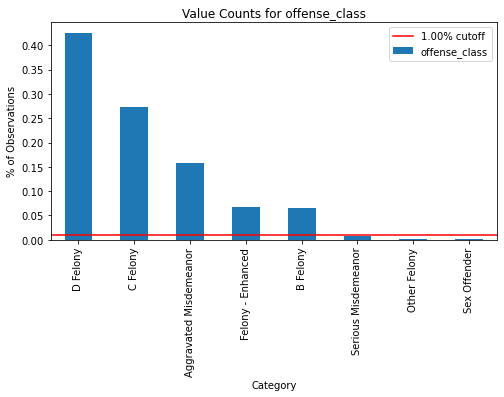

[i] Rare Labels Present in offense_class:
Serious Misdemeanor   0.01
Other Felony          0.00
Sex Offender          0.00
Name: offense_class, dtype: float64


In [33]:
plot_rare_labels(df,'offense_class')

## Remapping Binary Cols

In [34]:
binary_cols = df.columns[df.nunique()==2]
binary_cols

Index(['sex', 'return_to_prison', 'target_population'], dtype='object')

### 'sex'

In [35]:
sex_map = {'Male':1, 'Female':0}
sex_map

{'Male': 1, 'Female': 0}

In [36]:
df['sex'] = df['sex'].replace(sex_map)
df['sex'] = df['sex'].astype('category')
value_counts(df['sex'])

1   0.90
0   0.10
Name: sex.value_counts(normalized=True, dropna=False), dtype: float64

#### Remapping target

In [37]:
value_counts(df['return_to_prison'])

No    0.71
Yes   0.29
Name: return_to_prison.value_counts(normalized=True, dropna=False), dtype: float64

In [38]:
# # Recidivist
target_map = {'No':0,'Yes':1}
df['return_to_prison'] = df['return_to_prison'].map(target_map)
value_counts(df['return_to_prison'])

0   0.71
1   0.29
Name: return_to_prison.value_counts(normalized=True, dropna=False), dtype: float64

#### `target_pop`

In [39]:
value_counts(df['target_population'])

Yes   0.55
No    0.45
Name: target_population.value_counts(normalized=True, dropna=False), dtype: float64

In [40]:
df['target_population'] = df['target_population'].map( {'No':0,'Yes':1}).astype('category')
value_counts(df['target_population'])

1   0.55
0   0.45
Name: target_population.value_counts(normalized=True, dropna=False), dtype: float64

___
## FEATURE ENGINEERING
- **Engineering a simple 'felony' true false category**
- **Combining crime_type and crime_subtype into types_combined**

### Creating a simple 'felony' feature

In [41]:
# Engineering a simple 'felony' true false category
df['felony'] = df['offense_class'].str.contains('felony',case=False).astype('category')
value_counts(df['felony'])

True    0.83
False   0.17
Name: felony.value_counts(normalized=True, dropna=False), dtype: float64

In [42]:
df.dtypes

main_supervising_district      object
release_type                   object
race_ethnicity                 object
age_at_release                  int64
sex                          category
offense_class                  object
offense_type                   object
offense_subtype                object
return_to_prison                int64
target_population            category
felony                       category
dtype: object

In [43]:
df

main_supervising_district                  release_type        race_ethnicity  age_at_release sex  ...  offense_type                  offense_subtype return_to_prison  target_population felony
0                         7JD                        Parole  Black - Non-Hispanic              30   1  ...       Violent                          Robbery                1                  1   True
1                         NaN  Discharged – End of Sentence  White - Non-Hispanic              30   1  ...      Property                            Theft                1                  0   True
2                         5JD                        Parole  White - Non-Hispanic              40   1  ...          Drug                      Trafficking                1                  1   True
3                         6JD                        Parole  White - Non-Hispanic              30   1  ...         Other                   Other Criminal                0                  1   True
4                         NaN  Discharged – End of Sentence  Black - Non-Hispanic              40   1  ...       Violent                          Assault                1                  0   True
..                        ...                           ...                   ...             ...  ..  ...           ...                              ...              ...                ...    ...
995                       NaN  Discharged – End of Sentence      White - Hispanic              40   1  ...          Drug                      Trafficking                0                  0   True
996                       NaN  Discharged – End of Sentence      White - Hispanic              40   1  ...          Drug                      Trafficking                0                  0   True
997                       NaN  Discharged – End of Sentence      White - Hispanic              40   1  ...          Drug                      Trafficking                0                  0   True
998                       7JD                        Parole  Black - Non-Hispanic              40   1  ...  Public Order  Sex Offender Registry/Residency                0                  1   True
999                       NaN  Discharged – End of Sentence  White - Non-Hispanic              20   1  ...      Property                         Burglary                1                  0   True

[1000 rows x 11 columns]

In [44]:
# Combining crime_type and crime_subtype into types_combined
# df['offense_class_type_subtype']= df['offense_class']+'_'+df['offense_class']+'_'+df['offense_subtype']
# value_counts(df['offense_class_type_subtype'])
df.nunique()

main_supervising_district     8
release_type                  3
race_ethnicity                7
age_at_release                5
sex                           2
offense_class                 8
offense_type                  5
offense_subtype              24
return_to_prison              2
target_population             2
felony                        2
dtype: int64

### Creating a 'max_sentence' feature based on crime class max penalties
   

In [45]:
value_counts(df['offense_class']).sort_index()

Aggravated Misdemeanor   0.16
B Felony                 0.07
C Felony                 0.27
D Felony                 0.43
Felony - Enhanced        0.07
Other Felony             0.00
Serious Misdemeanor      0.01
Sex Offender             0.00
Name: offense_class.value_counts(normalized=True, dropna=False), dtype: float64

- Unsure what Other Felony might represent. Will assume its halfway between C and D penalty

In [46]:
# Mapping years onto crime class
offense_class_max_sentence_map = {'A Felony': 100,  # Life
                                'Aggravated Misdemeanor': 2, # 2 years
                                'B Felony': 25, # 25 or 50 years
                                'C Felony': 10, # 10 years
                                'D Felony': 5,  # 5 yeras
                                  'Other Felony': 7,
                                'Felony - Enhanced': 10, # Add on to class C and D felonies, hard to approximate. 
                                'Serious Misdemeanor': 1, # 1 year
                                'Sex Offender': 10, # 10 years
                                'Simple Misdemeanor': 30/365} # 30 days

# Mapping max_sentence_column
df['max_sentence'] =df['offense_class'].map(offense_class_max_sentence_map)
value_counts(df['max_sentence'])

5.00    0.43
10.00   0.34
2.00    0.16
25.00   0.07
1.00    0.01
7.00    0.00
Name: max_sentence.value_counts(normalized=True, dropna=False), dtype: float64

<AxesSubplot:xlabel='max_sentence', ylabel='Count'>

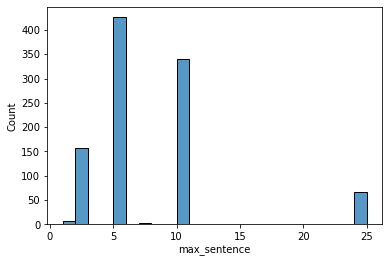

In [47]:
sns.histplot(df['max_sentence'])

### Final Null Check

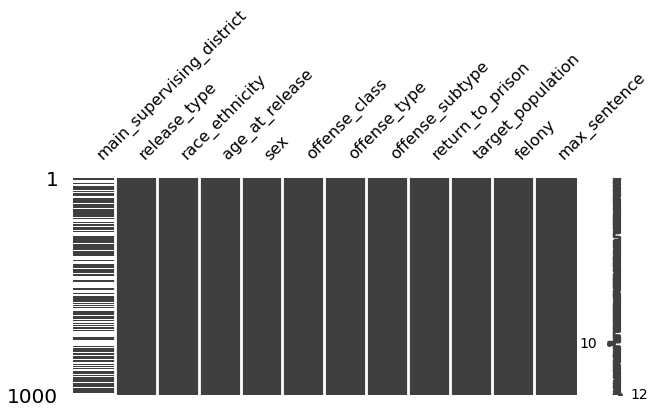

Columns with Null Values:


main_supervising_district    447
release_type                   2
dtype: int64

In [48]:
nulls_report(df)

# Preprocessing with  Pipelines and ColumnTransformer

In [49]:
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (StandardScaler, MinMaxScaler,RobustScaler,
                                   OneHotEncoder)

from sklearn.model_selection import train_test_split

In [50]:
from sklearn import set_config
set_config(display='diagram')

In [51]:
## Make x and y
target = 'return_to_prison'
X = df.drop(columns=target).copy()
y = df[target].copy()#.map( {'No':0,'Yes':1})
value_counts(y)

0   0.71
1   0.29
Name: return_to_prison.value_counts(normalized=True, dropna=False), dtype: float64

In [52]:
## Binary columns
X.columns[X.nunique() == 2]

Index(['sex', 'target_population', 'felony'], dtype='object')

In [53]:
X.dtypes

main_supervising_district      object
release_type                   object
race_ethnicity                 object
age_at_release                  int64
sex                          category
offense_class                  object
offense_type                   object
offense_subtype                object
target_population            category
felony                       category
max_sentence                  float64
dtype: object

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,
                                                    random_state=321)
X_train

main_supervising_district                  release_type                            race_ethnicity  age_at_release sex  ...  offense_type offense_subtype target_population felony max_sentence
286                       4JD                        Parole                      White - Non-Hispanic              50   1  ...      Property           Arson                 1   True        10.00
71                        NaN  Discharged – End of Sentence  Asian or Pacific Islander - Non-Hispanic              30   1  ...      Property       Vandalism                 0  False         2.00
86                        NaN  Discharged – End of Sentence                      White - Non-Hispanic              30   1  ...      Property           Theft                 0  False         2.00
17                        7JD                        Parole                      White - Non-Hispanic              40   0  ...      Property           Theft                 1   True         5.00
498                       5JD                        Parole                      Black - Non-Hispanic              50   1  ...  Public Order         Traffic                 1  False         2.00
..                        ...                           ...                                       ...             ...  ..  ...           ...             ...               ...    ...          ...
527                       NaN  Discharged – End of Sentence                      White - Non-Hispanic              40   1  ...      Property           Theft                 0   True         5.00
176                       5JD              Special Sentence                      White - Non-Hispanic              40   1  ...       Violent             Sex                 1  False         2.00
368                       NaN  Discharged – End of Sentence                      White - Non-Hispanic              40   1  ...      Property        Burglary                 0   True         5.00
211                       5JD                        Parole                      White - Non-Hispanic              50   1  ...       Violent         Assault                 1   True        10.00
710                       NaN  Discharged – End of Sentence                      White - Non-Hispanic              40   1  ...      Property           Theft                 0  False         2.00

[750 rows x 11 columns]

### Adding Feature Engine Encoders

In [55]:
from feature_engine import encoding as ce #import RareLabelEncoder, MeanEncoder,MeanEncoder
from feature_engine import discretisation as dsc
from feature_engine import imputation as imp

- https://feature-engine.readthedocs.io/en/1.1.x/quickstart.html

- It does not seem that FeatureEngine is currently easily integrated with a sklearn ColumnTransformer. 
    - [ ] **Explore how the rare label encoder works and determine if it makes sense to use BEFORE the column transformer.**

In [56]:
X_train.nunique()

main_supervising_district     8
release_type                  3
race_ethnicity                6
age_at_release                5
sex                           2
offense_class                 8
offense_type                  5
offense_subtype              23
target_population             2
felony                        2
max_sentence                  6
dtype: int64

In [57]:
rare_encoder = ce.RareLabelEncoder(tol=0.01,n_categories=5,variables=['offense_class',
                                                 'offense_subtype',
                                                'race_ethnicity'],)
rare_encoder.fit(X_train)

RareLabelEncoder(n_categories=5, tol=0.01,
                 variables=['offense_class', 'offense_subtype',
                            'race_ethnicity'])

In [58]:
## Testing out transformed columns
X_train_fe = rare_encoder.transform(X_train)
X_test_fe = rare_encoder.transform(X_test)
X_train_fe

main_supervising_district                  release_type        race_ethnicity  age_at_release sex           offense_class  offense_type offense_subtype target_population felony  max_sentence
286                       4JD                        Parole  White - Non-Hispanic              50   1                C Felony      Property           Arson                 1   True         10.00
71                        NaN  Discharged – End of Sentence                  Rare              30   1  Aggravated Misdemeanor      Property       Vandalism                 0  False          2.00
86                        NaN  Discharged – End of Sentence  White - Non-Hispanic              30   1  Aggravated Misdemeanor      Property           Theft                 0  False          2.00
17                        7JD                        Parole  White - Non-Hispanic              40   0                D Felony      Property           Theft                 1   True          5.00
498                       5JD                        Parole  Black - Non-Hispanic              50   1  Aggravated Misdemeanor  Public Order         Traffic                 1  False          2.00
..                        ...                           ...                   ...             ...  ..                     ...           ...             ...               ...    ...           ...
527                       NaN  Discharged – End of Sentence  White - Non-Hispanic              40   1                D Felony      Property           Theft                 0   True          5.00
176                       5JD              Special Sentence  White - Non-Hispanic              40   1  Aggravated Misdemeanor       Violent             Sex                 1  False          2.00
368                       NaN  Discharged – End of Sentence  White - Non-Hispanic              40   1                D Felony      Property        Burglary                 0   True          5.00
211                       5JD                        Parole  White - Non-Hispanic              50   1                C Felony       Violent         Assault                 1   True         10.00
710                       NaN  Discharged – End of Sentence  White - Non-Hispanic              40   1  Aggravated Misdemeanor      Property           Theft                 0  False          2.00

[750 rows x 11 columns]

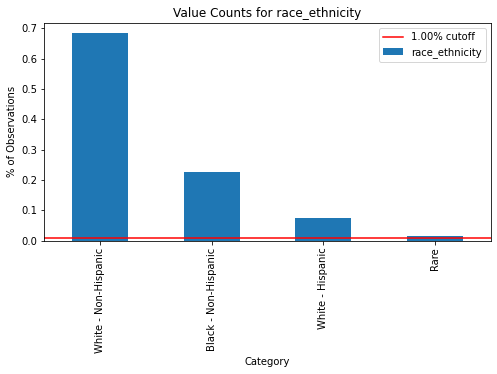

[i] No Rare Labels Present in race_ethnicity.


In [59]:
plot_rare_labels(X_train_fe,'race_ethnicity')

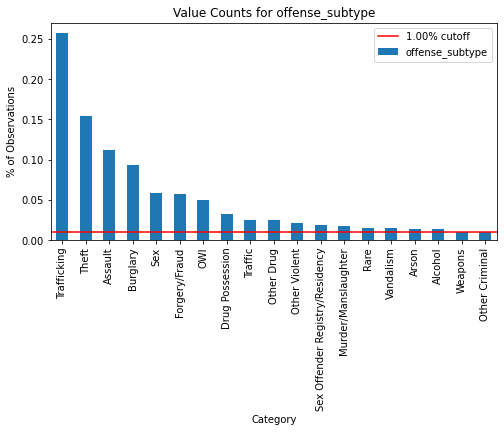

[i] No Rare Labels Present in offense_subtype.


In [60]:
plot_rare_labels(X_train_fe,'offense_subtype')

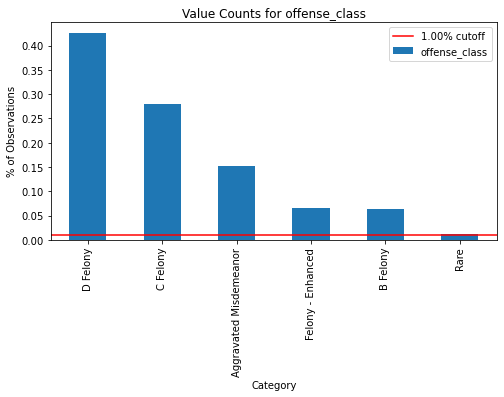

[i] No Rare Labels Present in offense_class.


In [61]:
plot_rare_labels(X_train_fe,'offense_class')

In [62]:
# nulls_report(X_train)

## ColumnTransformer

- Plan is to make 1 ColumnTransformer without scaling, then to add scaling as a step in a modeling pipeline

### 🎛 Set X_train/X_train_fe

In [63]:
## RENAMING X_TRAIN/X_TRAIN_FE TO SIMPLIFY CODE
USE_FE_COLS = False

if USE_FE_COLS:
    print('[i] Using Feature Engine X_train/X_test.')
    try:
        X_train_raw
    except NameError:
        X_train_raw = X_train.copy()
        X_test_raw = X_test.copy()
        print('[i] The original versions X_train/X_test are now saved as: X_train_raw and X_test_raw')
    finally:
        
        X_train = X_train_fe.copy()
        X_test = X_test_fe.copy()

        print('[i] X_train and X_test have been filled with the data from X_train_fe/X_test_fe')
        
else:
    print('[i] Using original X_train,X_test.')

[i] Using original X_train,X_test.


In [64]:
X_train.dtypes

main_supervising_district      object
release_type                   object
race_ethnicity                 object
age_at_release                  int64
sex                          category
offense_class                  object
offense_type                   object
offense_subtype                object
target_population            category
felony                       category
max_sentence                  float64
dtype: object

In [65]:
## 
binary_cols = X_train.select_dtypes('category').columns
binary_cols

Index(['sex', 'target_population', 'felony'], dtype='object')

In [66]:
## categotical columns to encode
cat_cols = list(X_train.select_dtypes('object').columns)
cat_cols

['main_supervising_district',
 'release_type',
 'race_ethnicity',
 'offense_class',
 'offense_type',
 'offense_subtype']

In [67]:
## Get a list of columns to be run as numeric data
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['age_at_release', 'max_sentence'], dtype='object')

In [68]:
## make sure no cols missed
[c for c in X_train.columns if c not in [*num_cols,*cat_cols,*binary_cols]]

[]

In [69]:
from sklearn import set_config,clone
set_config(display='diagram')

In [70]:
## Make a num_transformer pipeline
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median'))])
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median'))])

In [71]:
# num_transformer_reg = clone(num_transformer)
# num_transformer_reg.steps.append(('scaler',StandardScaler()))
# num_transformer_reg

In [72]:
## Create a cat_transformer pipeline 
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='MISSING')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse=False))])#handle_unknown='ignore',
cat_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='MISSING', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

### Combine Preprocessing into one ColumnTransformer

In [73]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num', num_transformer, num_cols),
    ('binaary','passthrough',binary_cols),
    ('cat', cat_transformer, cat_cols)
])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median'))]),
                                 Index(['age_at_release', 'max_sentence'], dtype='object')),
                                ('binaary', 'passthrough',
                                 Index(['sex', 'target_population', 'felony'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['main_supervising_district', 'release_type',
                                  'race_ethnicity', 'offense_class',
                                  'offense_type', 'offense_subtype'])])

In [74]:
# preprocessing_reg = ColumnTransformer(transformers=[
#     ('num',num_transformer_reg,num_cols),
#     ('cat',cat_transformer,cat_cols),
#     ])
# preprocessing

In [75]:
## Get X_train and X_test from column transformer
preprocessing.fit(X_train,y_train)
cat_features = preprocessing.named_transformers_['cat']\
                    .named_steps['encoder'].get_feature_names(cat_cols)
cat_features

array(['main_supervising_district_1JD', 'main_supervising_district_2JD',
       'main_supervising_district_3JD', 'main_supervising_district_4JD',
       'main_supervising_district_5JD', 'main_supervising_district_6JD',
       'main_supervising_district_7JD', 'main_supervising_district_8JD',
       'main_supervising_district_MISSING',
       'release_type_Discharged – End of Sentence',
       'release_type_MISSING', 'release_type_Parole',
       'release_type_Special Sentence',
       'race_ethnicity_American Indian or Alaska Native - Hispanic',
       'race_ethnicity_American Indian or Alaska Native - Non-Hispanic',
       'race_ethnicity_Asian or Pacific Islander - Non-Hispanic',
       'race_ethnicity_Black - Non-Hispanic',
       'race_ethnicity_White - Hispanic',
       'race_ethnicity_White - Non-Hispanic',
       'offense_class_Aggravated Misdemeanor', 'offense_class_B Felony',
       'offense_class_C Felony', 'offense_class_D Felony',
       'offense_class_Felony - Enhanced', 'o

In [76]:
## Get full list of features

columns = [*num_cols,*binary_cols, *cat_features]
len(columns)
# columns=[*num_cols,*cat_cols,*encoded_cols]

60

In [77]:
preprocessing.transform(X_train).shape,preprocessing.transform(X_test).shape

((750, 60), (250, 60))

In [78]:
## Transform X_train/X_test and remake df
X_train_tf = pd.DataFrame(preprocessing.transform(X_train),
                          columns=columns,index=X_train.index)
X_test_tf = pd.DataFrame(preprocessing.transform(X_test),
                          columns=columns,index=X_test.index)
X_train_tf

age_at_release max_sentence sex target_population felony  ... offense_subtype_Theft offense_subtype_Traffic offense_subtype_Trafficking offense_subtype_Vandalism offense_subtype_Weapons
286          50.00        10.00   1                 1   True  ...                  0.00                    0.00                        0.00                      0.00                    0.00
71           30.00         2.00   1                 0  False  ...                  0.00                    0.00                        0.00                      1.00                    0.00
86           30.00         2.00   1                 0  False  ...                  1.00                    0.00                        0.00                      0.00                    0.00
17           40.00         5.00   0                 1   True  ...                  1.00                    0.00                        0.00                      0.00                    0.00
498          50.00         2.00   1                 1  False  ...                  0.00                    1.00                        0.00                      0.00                    0.00
..             ...          ...  ..               ...    ...  ...                   ...                     ...                         ...                       ...                     ...
527          40.00         5.00   1                 0   True  ...                  1.00                    0.00                        0.00                      0.00                    0.00
176          40.00         2.00   1                 1  False  ...                  0.00                    0.00                        0.00                      0.00                    0.00
368          40.00         5.00   1                 0   True  ...                  0.00                    0.00                        0.00                      0.00                    0.00
211          50.00        10.00   1                 1   True  ...                  0.00                    0.00                        0.00                      0.00                    0.00
710          40.00         2.00   1                 0  False  ...                  1.00                    0.00                        0.00                      0.00                    0.00

[750 rows x 60 columns]

> **One downside of Pipelines is that its harder to get the individual info we need to re-form our dataset as a df**

# MODELING

In [79]:
import sklearn.metrics as metrics

def evaluate_classification(model,X_test,y_test,classes=['Non Recid','Recidivst'],
                           normalize='true',cmap='Purples',label='',
                           return_report=False):
    """Accepts an sklearn-compatible classification model + test data 
    and displays several sklearn.metrics functions: 
    - classifciation_report
    - plot_confusion_matrix
    - plot_roc_curve
    """
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    ## Classification Report / Scores 
    table_header = "[i] CLASSIFICATION REPORT"
    
    ## Add Label if given
    if len(label)>0:
        table_header += f":\t{label}"
        
    
    ## PRINT CLASSIFICATION REPORT
    dashes = '---'*20
    print(dashes,table_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))
    
    report = metrics.classification_report(y_test,y_hat_test,
                                               target_names=classes,
                                          output_dict=True)
    print(dashes+"\n\n")
    
    

    ## MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,4),ncols=2)
    
    ## Plot Confusion Matrix 
    metrics.plot_confusion_matrix(model, X_test,y_test,
                                  display_labels=classes,
                                  normalize=normalize,
                                 cmap=cmap,ax=axes[0])
    axes[0].set(title='Confusion Matrix')
    
    ## Plot Roc Curve
    roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].legend()
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    fig.tight_layout()
    plt.show()
    
    if return_report:
        return report #fig,axes

## Baseline DummyClassifier

------------------------------------------------------------
[i] CLASSIFICATION REPORT:	Dummy Classifier
------------------------------------------------------------
              precision    recall  f1-score   support

   Non Recid       0.72      0.71      0.72       178
   Recidivst       0.30      0.31      0.30        72

    accuracy                           0.60       250
   macro avg       0.51      0.51      0.51       250
weighted avg       0.60      0.60      0.60       250

------------------------------------------------------------




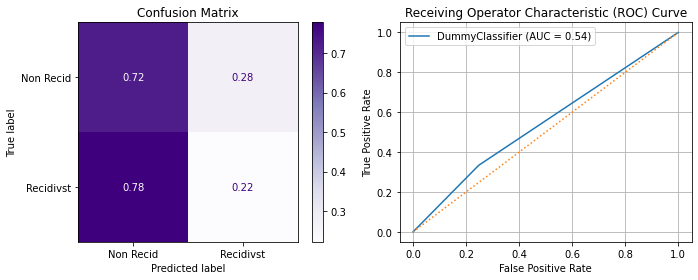

In [80]:
from sklearn.dummy import DummyClassifier

dummy= DummyClassifier(strategy='stratified')
dummy.fit(X_train_tf,y_train)
evaluate_classification(dummy,X_test_tf,y_test,
                       label='Dummy Classifier')

### Vanilla RandomForest

In [81]:
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

### RF #1`

------------------------------------------------------------
	CLASSIFICATION REPORT - Vanilla Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.88      0.83       178
           1       0.58      0.42      0.48        72

    accuracy                           0.74       250
   macro avg       0.68      0.65      0.66       250
weighted avg       0.73      0.74      0.73       250



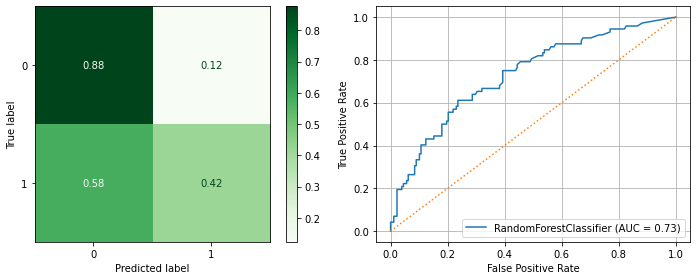

Training Score = 0.96
Test Score = 0.74


In [82]:
# from sklearn.ensemble import RandomForestClassifier,StackingClassifier
# from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

## 
clf = RandomForestClassifier()
clf.fit(X_train_tf,y_train)


ji.evaluate_classification(clf,X_test_tf,y_test,X_train=X_train_tf,
                           y_train=y_train,label="Vanilla Random Forest")
# evaluate_classification(clf,X_test_tf,y_test,

## RF- Pipe

------------------------------------------------------------
	CLASSIFICATION REPORT - Vanilla Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       178
           1       0.53      0.44      0.48        72

    accuracy                           0.73       250
   macro avg       0.66      0.64      0.65       250
weighted avg       0.72      0.73      0.72       250



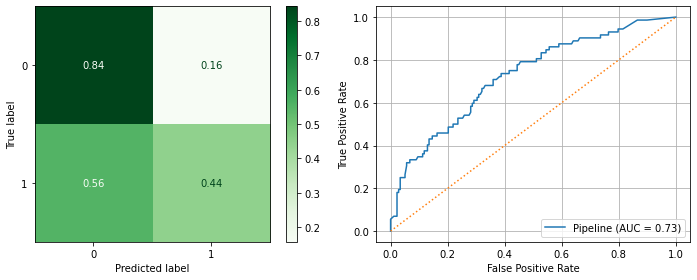

Training Score = 0.96
Test Score = 0.73


In [83]:
## Making a Pipeline/GridSearch to confirm if scaling makes a diff
clf_pipe = Pipeline(steps=[
    ('scaler',StandardScaler()), 
    ('clf',RandomForestClassifier(class_weight='balanced'))
     ])
clf_pipe.fit(X_train_tf,y_train)


ji.evaluate_classification(clf_pipe,X_test_tf,y_test,X_train=X_train_tf,
                           y_train=y_train,label="Vanilla Random Forest")

In [84]:
set_config(display='text')
clf_pipe

Pipeline(steps=[('scaler', StandardScaler()),
                ('clf', RandomForestClassifier(class_weight='balanced'))])

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   11.8s finished


{'clf__class_weight': 'balanced', 'scaler': RobustScaler()}
------------------------------------------------------------
	CLASSIFICATION REPORT - GridSearch Best Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       178
           1       0.54      0.44      0.49        72

    accuracy                           0.73       250
   macro avg       0.67      0.65      0.65       250
weighted avg       0.72      0.73      0.72       250



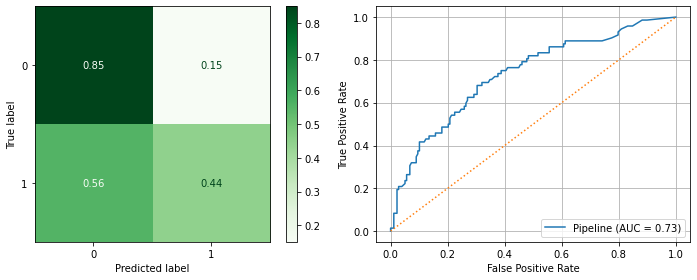

Training Score = 0.96
Test Score = 0.73


In [85]:
## Gridsearch for scaing and class_weight
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

params = {'scaler':['passthrough',StandardScaler(),MinMaxScaler(),RobustScaler()],
         'clf__class_weight':[None, 'balanced','balanced_subsample']}
grid = GridSearchCV(clf_pipe, params, verbose=True,scoring='recall_macro')

grid.fit(X_train_tf,y_train)
print(grid.best_params_)
ji.evaluate_classification(grid.best_estimator_,X_test_tf,y_test
                           ,X_train=X_train_tf, y_train=y_train,
                           label="GridSearch Best Random Forest")

In [86]:
def get_feature_importance(clf,X_train_tf,plot=True):
    importances = pd.Series(clf.feature_importances_,index=X_train_tf.columns)
    return importances.sort_values(ascending=False)

def plot_importance(clf,X_train_tf,n=25):
    importances = get_feature_importance(clf,X_train_tf)
    ax = importances.sort_values().tail(n).plot(kind='barh')#,figsize=figsize)
    ax.set(title=f"Top {n} Most Important Features",xlabel='importance')

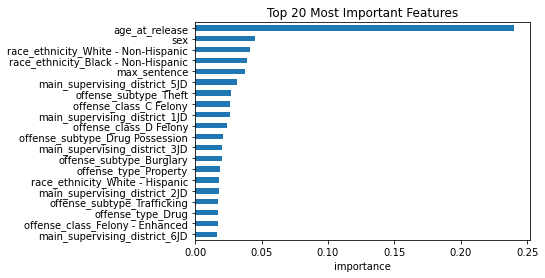

In [87]:
plot_importance(clf, X_test_tf,n=20)

### RandomForest - `class_weight="balanced_subsample"`

------------------------------------------------------------
	CLASSIFICATION REPORT - Random Forest (class_weight='balanced')
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       178
           1       0.49      0.43      0.46        72

    accuracy                           0.71       250
   macro avg       0.64      0.63      0.63       250
weighted avg       0.70      0.71      0.70       250



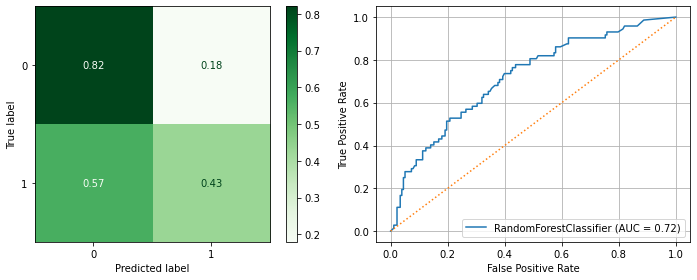

Training Score = 0.96
Test Score = 0.71


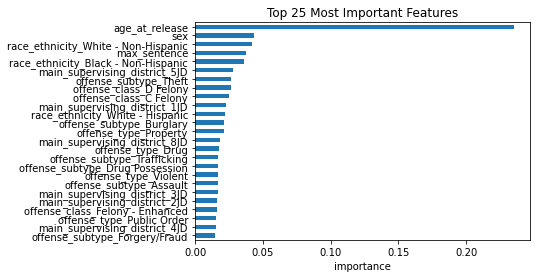

In [88]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_tf,y_train)
ji.evaluate_classification(clf,X_test_tf,y_test,X_train=X_train_tf,y_train=y_train,
                           label= "Random Forest (class_weight='balanced')")
plot_importance(clf,X_test_tf)

## SMOTENC for Class Imbalance

In [89]:
## Getting cat features index
cat_col_index = [False for col in num_cols]
cat_col_index.extend([True for col in binary_cols])

cat_col_index.extend([True for col in cat_features])
X_train_tf.columns[cat_col_index]

Index(['sex', 'target_population', 'felony', 'main_supervising_district_1JD',
       'main_supervising_district_2JD', 'main_supervising_district_3JD',
       'main_supervising_district_4JD', 'main_supervising_district_5JD',
       'main_supervising_district_6JD', 'main_supervising_district_7JD',
       'main_supervising_district_8JD', 'main_supervising_district_MISSING',
       'release_type_Discharged – End of Sentence', 'release_type_MISSING',
       'release_type_Parole', 'release_type_Special Sentence',
       'race_ethnicity_American Indian or Alaska Native - Hispanic',
       'race_ethnicity_American Indian or Alaska Native - Non-Hispanic',
       'race_ethnicity_Asian or Pacific Islander - Non-Hispanic',
       'race_ethnicity_Black - Non-Hispanic',
       'race_ethnicity_White - Hispanic',
       'race_ethnicity_White - Non-Hispanic',
       'offense_class_Aggravated Misdemeanor', 'offense_class_B Felony',
       'offense_class_C Felony', 'offense_class_D Felony',
       'offen

In [90]:
from imblearn.over_sampling import SMOTENC
smote = SMOTENC(cat_col_index, n_jobs=-1)

X_train_smote,y_train_smote = smote.fit_resample(X_train_tf,y_train)
y_train_smote.value_counts()

0    532
1    532
Name: return_to_prison, dtype: int64

In [91]:
X_train_smote[:5]

age_at_release max_sentence sex target_population felony  ... offense_subtype_Theft offense_subtype_Traffic offense_subtype_Trafficking offense_subtype_Vandalism offense_subtype_Weapons
0          50.00        10.00   1                 1   True  ...                  0.00                    0.00                        0.00                      0.00                    0.00
1          30.00         2.00   1                 0  False  ...                  0.00                    0.00                        0.00                      1.00                    0.00
2          30.00         2.00   1                 0  False  ...                  1.00                    0.00                        0.00                      0.00                    0.00
3          40.00         5.00   0                 1   True  ...                  1.00                    0.00                        0.00                      0.00                    0.00
4          50.00         2.00   1                 1  False  ...                  0.00                    1.00                        0.00                      0.00                    0.00

[5 rows x 60 columns]

### RandomForest with SMOTE

------------------------------------------------------------
	CLASSIFICATION REPORT - RandomForest - SMOTE
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       178
           1       0.54      0.53      0.54        72

    accuracy                           0.74       250
   macro avg       0.68      0.67      0.68       250
weighted avg       0.73      0.74      0.73       250



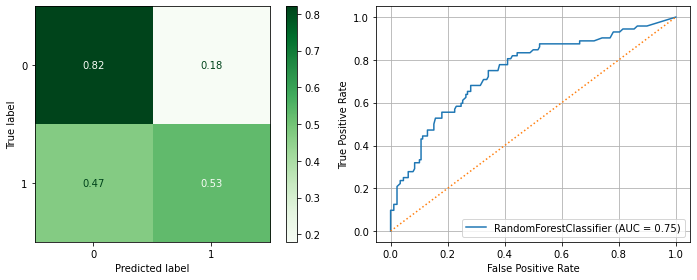

Training Score = 0.96
Test Score = 0.74


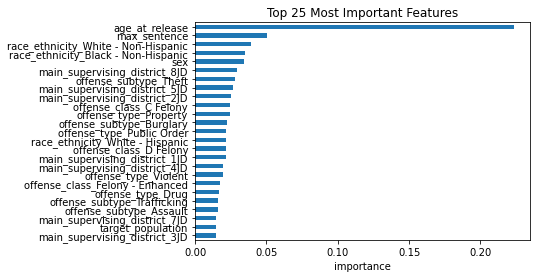

In [92]:
clf = RandomForestClassifier()#class_weight='balanced')
clf.fit(X_train_smote,y_train_smote)
ji.evaluate_classification(clf,X_test_tf,y_test,X_train=X_train_tf,y_train=y_train,
                           label='RandomForest - SMOTE')
plot_importance(clf,X_test_tf)

<AxesSubplot:ylabel='Count'>

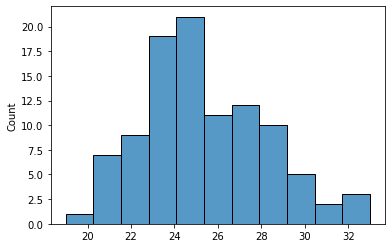

In [93]:
depths = [tree.get_depth() for tree in clf.estimators_]
sns.histplot(depths)

### GridSearch RF

```python
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

clf = RandomForestClassifier()
params ={'max_depth':[None,5,7,10,20,30,],
         'min_samples_leaf':[1,2,3],
         'criterion':['gini','entropy'],        
        }


grid = GridSearchCV(clf,params,scoring='recall_macro', n_jobs=-1)

grid.fit(X_train_smote,y_train_smote)
print(grid.best_params_)

print(grid.best_score_)
evaluate_classification(grid.best_estimator_,X_test_tf,y_test)
```

In [94]:
clf_pipe = Pipeline(steps=[
    ('scaler',StandardScaler()), 
    ('clf',RandomForestClassifier(class_weight='balanced'))
     ])

params ={'scaler':['passthrough',StandardScaler(),MinMaxScaler()],
         'clf__class_weight':['balanced','balanced_subsample'],
         'clf__max_depth':[None,30,33,35,37],
         'clf__min_samples_leaf':[1,2,3],
         'clf__min_samples_split':[2,3],
         'clf__criterion':['gini','entropy'], 
#          'clf__n_estimators':[50,100,150]
        }

grid = GridSearchCV(clf_pipe, params, verbose=True,
                    n_jobs=-1,cv=3,scoring='recall_macro')

grid.fit(X_train_tf,y_train)

Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   34.6s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   54.1s finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        RandomForestClassifier(class_weight='balanced'))]),
             n_jobs=-1,
             param_grid={'clf__class_weight': ['balanced',
                                               'balanced_subsample'],
                         'clf__criterion': ['gini', 'entropy'],
                         'clf__max_depth': [None, 30, 33, 35, 37],
                         'clf__min_samples_leaf': [1, 2, 3],
                         'clf__min_samples_split': [2, 3],
                         'scaler': ['passthrough', StandardScaler(),
                                    MinMaxScaler()]},
             scoring='recall_macro', verbose=True)

{'clf__class_weight': 'balanced', 'clf__criterion': 'gini', 'clf__max_depth': 35, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 3, 'scaler': 'passthrough'}
0.6127167220256469
------------------------------------------------------------
	CLASSIFICATION REPORT - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       178
           1       0.46      0.44      0.45        72

    accuracy                           0.69       250
   macro avg       0.62      0.62      0.62       250
weighted avg       0.69      0.69      0.69       250



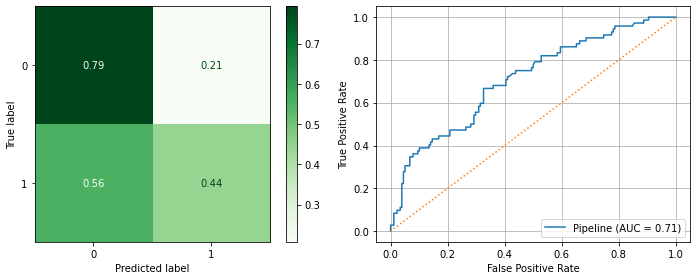

Training Score = 0.95
Test Score = 0.69


In [95]:
print(grid.best_params_)
print(grid.best_score_)
ji.evaluate_classification(grid.best_estimator_,X_test_tf,y_test,
                           X_train=X_train_tf,y_train=y_train)

### Random Forest Observations/Summary

- Random Forests seem to have a hard time learning about the minority class- Return-to_prison = Yes

## XGBoost

- [Parameter tuning for xgboost](https://xgboost.readthedocs.io/en/latest/tutorials/param_tuning.html)

In [96]:
from xgboost import XGBRFClassifier,XGBClassifier
import xgboost as xgb
xgb.__version__

'1.3.3'

In [97]:
y_train_smote

0       0
1       0
2       0
3       1
4       1
       ..
1059    1
1060    1
1061    1
1062    1
1063    1
Name: return_to_prison, Length: 1064, dtype: int64

In [98]:
scaler = MinMaxScaler()
X_train_reg = pd.DataFrame(scaler.fit_transform(X_train_tf),
                           columns=X_train_tf.columns, index=X_train_tf.index)
X_test_reg = pd.DataFrame(scaler.transform(X_test_tf),
                          columns=X_train_tf.columns, index=X_test_tf.index)
X_train_reg.describe()

age_at_release  max_sentence    sex  target_population  felony  ...  offense_subtype_Theft  offense_subtype_Traffic  offense_subtype_Trafficking  offense_subtype_Vandalism  offense_subtype_Weapons
count          750.00        750.00 750.00             750.00  750.00  ...                 750.00                   750.00                       750.00                     750.00                   750.00
mean             0.33          0.27   0.90               0.55    0.84  ...                   0.15                     0.03                         0.26                       0.01                     0.01
std              0.25          0.23   0.29               0.50    0.37  ...                   0.36                     0.16                         0.44                       0.12                     0.10
min              0.00          0.00   0.00               0.00    0.00  ...                   0.00                     0.00                         0.00                       0.00                     0.00
25%              0.20          0.17   1.00               0.00    1.00  ...                   0.00                     0.00                         0.00                       0.00                     0.00
50%              0.30          0.17   1.00               1.00    1.00  ...                   0.00                     0.00                         0.00                       0.00                     0.00
75%              0.40          0.37   1.00               1.00    1.00  ...                   0.00                     0.00                         1.00                       0.00                     0.00
max              1.00          1.00   1.00               1.00    1.00  ...                   1.00                     1.00                         1.00                       1.00                     1.00

[8 rows x 60 columns]

In [99]:
## Getting cat features index
cat_col_index = [False for col in num_cols]
cat_col_index.extend([True for col in binary_cols])

cat_col_index.extend([True for col in cat_features])

smote = SMOTENC(cat_col_index, n_jobs=-1)

X_train_reg_smote,y_train_reg_smote = smote.fit_resample(X_train_reg,y_train)
y_train_reg_smote.value_counts()

0    532
1    532
Name: return_to_prison, dtype: int64

### XGBoost Classifier

------------------------------------------------------------
	CLASSIFICATION REPORT - XGBoost Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.72      0.77       178
           1       0.47      0.61      0.53        72

    accuracy                           0.69       250
   macro avg       0.64      0.67      0.65       250
weighted avg       0.72      0.69      0.70       250



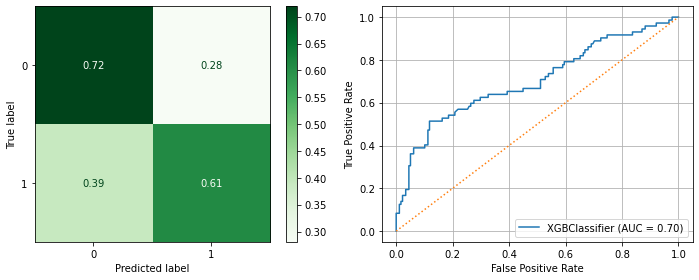

Training Score = 0.91
Test Score = 0.69


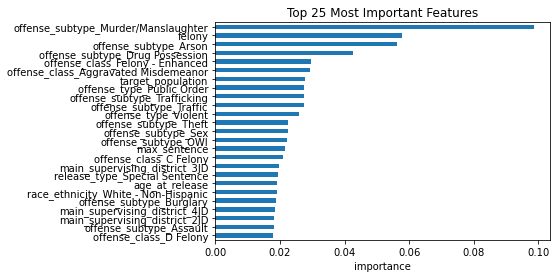

In [100]:
clf = XGBClassifier(objective='binary:logistic',
                    learning_rate=0.5,#early_stopping=4,
                    use_label_encoder=False,
                    scale_pos_weight=4,
                    verbosity=0,#min_child_weight=0.8,
                    max_depth=6)

clf.fit(X_train_reg,y_train,verbose=False,#eval_metric='error',
        eval_set=[(X_train_reg,y_train),(X_test_reg, y_test)])

ji.evaluate_classification(clf,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='XGBoost Random Forest');
# plt.show()
plot_importance(clf,X_test_tf)

### XGBoost RF Classifier

#### Smoted Data

------------------------------------------------------------
	CLASSIFICATION REPORT - XGBoost Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.60      0.70       178
           1       0.41      0.71      0.52        72

    accuracy                           0.63       250
   macro avg       0.62      0.65      0.61       250
weighted avg       0.71      0.63      0.65       250



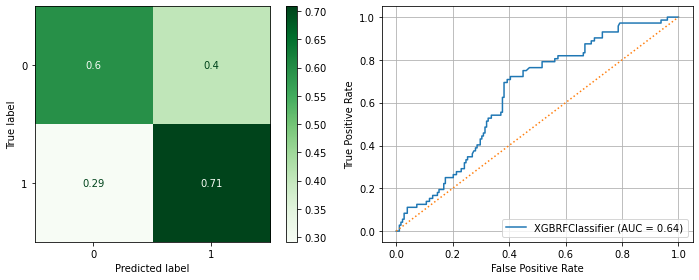

Training Score = 0.71
Test Score = 0.63


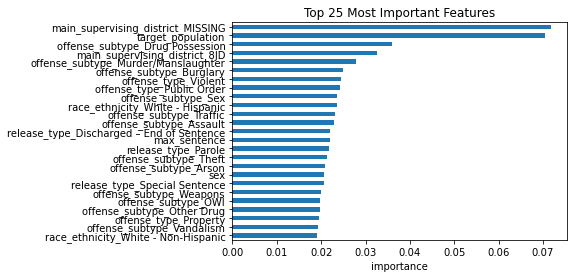

In [101]:
clf = XGBRFClassifier(learning_rate=0.4,use_label_encoder=False,
                      objective='binary:logistic',early_stopping=3,
                      scale_pos_weight=2.4,
                      max_depth=6)#class_weight='balanced')
clf.fit(X_train_reg,y_train)

ji.evaluate_classification(clf,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='XGBoost Random Forest');
# plt.show()
plot_importance(clf,X_test_tf)

#### Imbalanced Data+scale_pos_weight

In [102]:
# from sklearn.utils import compute_class_weight
# classes = np.unique(y_train)
# weights= dict(zip(classes,compute_class_weight(class_weight='balanced',classes=classes,
#                           y=y_train)))
# weights

In [103]:
# clf = XGBRFClassifier(scale_pos_weight=2.3)#class_weight='balanced')
# clf.fit(X_train_reg,y_train)

# ji.evaluate_classification(clf,X_test_reg,y_test,
#                            X_train=X_train_reg,y_train=y_train,
#                            label='XGBoost Random Forest');
# # plt.show()
# plot_importance(clf,X_test_tf)

In [104]:
# clf = XGBRFClassifier(scale_pos_weight=2.3)#class_weight='balanced')
# clf.fit(X_train_reg,y_train)

# ji.evaluate_classification(clf,X_test_reg,y_test,
#                            X_train=X_train_reg,y_train=y_train,
#                            label='XGBoost Random Forest');
# # plt.show()
# plot_importance(clf,X_test_tf)

In [105]:
# np.linspace(1.8,4.0,num=10)

In [106]:

# clf = XGBClassifier(scale_pos_rate=2.1,use_label_encoder=False)
# params ={'learning_rate':[1,0.1,0.3,0.5],
         
# #          'scale_pos_rate':np.linspace(1.8,4.0,num=10),
# #          'n_estimators':[100,50,200,25],
#          'max_depth':[4,5,6],
# #          'subsample':[0.8,0.7,0.9,0.6,0.5],
# #         'reg_lambda' :[1e-05,1e-04,1e-02,.1,1,10]
#          'eval_'
#         }


# grid = GridSearchCV(clf, params, cv=3,scoring='recall_macro')
# grid.fit(X_train_reg,y_train)


# print(grid.best_params_)
# print(grid.best_score_)
# ji.evaluate_classification(grid.best_estimator_,X_test_reg,y_test,
#                            X_train=X_train_reg,y_train=y_train)

# BOOKMARK 07/18/21

In [107]:
# from tqdm.contrib import tenumerate

In [108]:
# clf = XGBRFClassifier(n_estimators=100)
# params ={'learning_rate':[10,1,0.1,0.01,0.5],
#          'n_estimators':[100,50,200,25],
#          'subsample':[0.8,0.7,0.9,0.6,0.5],
#         'reg_lambda' :[1e-05,1e-04,1e-02,.1,1,10]}


# if RUN_SEARCHES:
    

#     # scores =['recall','recall_macro','accuracy']

#     GRIDS={}

#     ## Build loop to make dict of grids for each score method
#     scores =['f1','f1_macro','roc_auc','recall','recall_macro']#,'accuracy','precision']

#     reports = {}
#     for _,score in tenumerate(scores):
#         line = '==='*30
#         print(line)
#         print(f'[i] Starting {score}',end='\n'+line+"\n")

#         GRIDS[score] = GridSearchCV(clf,params,cv=3,
#                                     scoring=score,
#                                     verbose=True,
#                                     n_jobs=-1)
#         GRIDS[score].fit(X_train_reg_smote,y_train_reg_smote)

#         print(f"\n[i] Best Params for scoring={score}:" )
#         print(GRIDS[score].best_params_)
#         print('\n\n')

#         reports[score] = ji.evaluate_classification( 
#             GRIDS[score].best_estimator_,
#             X_test_reg,y_test,label=score, 
#             X_train=X_train_reg_smote, y_train=y_train_reg_smote,return_report=True)
#         print('\n\n')
#         ## Adding best_params to reports
#     #     reports[score]['best_params'] = GRIDS[score].best_params_

### SVC

```python
from sklearn.svm import LinearSVC,SVC
clf = SVC(kernel='rbf',max_iter=5000,class_weight='balanced')
clf.fit(X_train_reg,y_train)

ji.evaluate_classification(clf,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='LinearSVC');
```

In [109]:
scaler = MinMaxScaler()
X_train_reg = pd.DataFrame(scaler.fit_transform(X_train_tf),
                           columns=X_train_tf.columns, index=X_train_tf.index)
X_test_reg = pd.DataFrame(scaler.transform(X_test_tf),
                          columns=X_train_tf.columns, index=X_test_tf.index)
X_train_reg.describe()

age_at_release  max_sentence    sex  target_population  felony  ...  offense_subtype_Theft  offense_subtype_Traffic  offense_subtype_Trafficking  offense_subtype_Vandalism  offense_subtype_Weapons
count          750.00        750.00 750.00             750.00  750.00  ...                 750.00                   750.00                       750.00                     750.00                   750.00
mean             0.33          0.27   0.90               0.55    0.84  ...                   0.15                     0.03                         0.26                       0.01                     0.01
std              0.25          0.23   0.29               0.50    0.37  ...                   0.36                     0.16                         0.44                       0.12                     0.10
min              0.00          0.00   0.00               0.00    0.00  ...                   0.00                     0.00                         0.00                       0.00                     0.00
25%              0.20          0.17   1.00               0.00    1.00  ...                   0.00                     0.00                         0.00                       0.00                     0.00
50%              0.30          0.17   1.00               1.00    1.00  ...                   0.00                     0.00                         0.00                       0.00                     0.00
75%              0.40          0.37   1.00               1.00    1.00  ...                   0.00                     0.00                         1.00                       0.00                     0.00
max              1.00          1.00   1.00               1.00    1.00  ...                   1.00                     1.00                         1.00                       1.00                     1.00

[8 rows x 60 columns]

In [110]:
from sklearn.svm import LinearSVC,SVC

[LibSVM]------------------------------------------------------------
	CLASSIFICATION REPORT - SVC
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.85      0.79       178
           1       0.44      0.29      0.35        72

    accuracy                           0.69       250
   macro avg       0.59      0.57      0.57       250
weighted avg       0.66      0.69      0.67       250



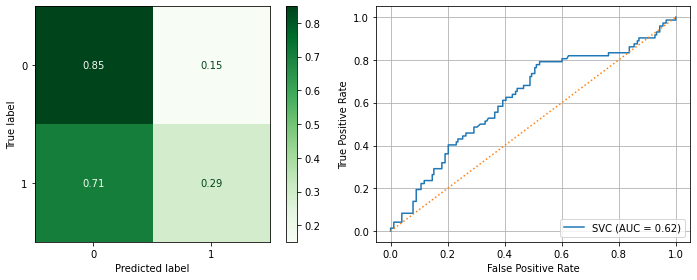

Training Score = 0.80
Test Score = 0.69


In [111]:
## smoted data
clf = SVC(kernel='rbf',max_iter=5000,verbose=True)#,class_weight='balanced')
clf.fit(X_train_reg_smote,y_train_reg_smote)

ji.evaluate_classification(clf,X_test_reg,y_test,
                           X_train=X_train_reg_smote,y_train=y_train_reg_smote,
                           label='SVC');
# plt.show()

[LibSVM]------------------------------------------------------------
	CLASSIFICATION REPORT - SVC
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.57      0.67       178
           1       0.38      0.67      0.49        72

    accuracy                           0.60       250
   macro avg       0.60      0.62      0.58       250
weighted avg       0.69      0.60      0.62       250



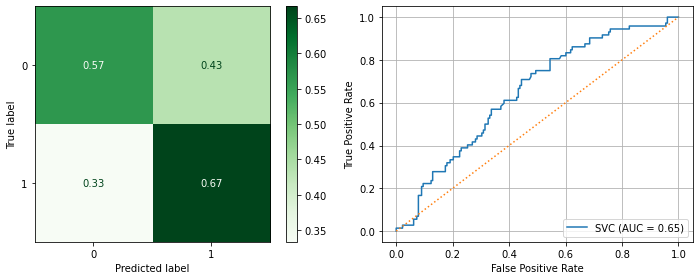

Training Score = 0.67
Test Score = 0.60


In [112]:
clf = SVC(kernel='rbf',max_iter=5000,verbose=True,class_weight='balanced')
clf.fit(X_train_reg,y_train)

ji.evaluate_classification(clf,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='SVC');
# plt.show()

In [113]:
# X_train_reg_smote

In [114]:
np.linspace(0,1,20)

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

Fitting 3 folds for each of 308 candidates, totalling 924 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 821 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 924 out of 924 | elapsed:    7.3s finished


[LibSVM]

/opt/anaconda3/envs/learn-env-new/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


{'C': 1000000.0, 'class_weight': 'balanced', 'gamma': 0.3157894736842105}
------------------------------------------------------------
	CLASSIFICATION REPORT - SVC
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       178
           1       0.44      0.47      0.46        72

    accuracy                           0.68       250
   macro avg       0.61      0.62      0.61       250
weighted avg       0.68      0.68      0.68       250



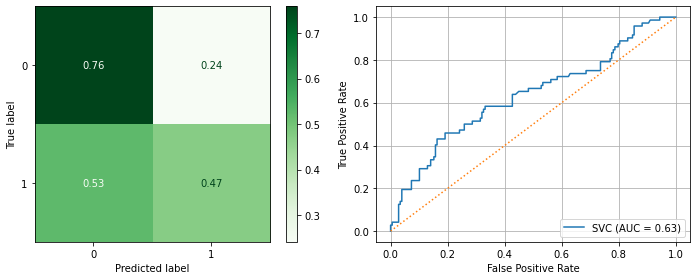

Training Score = 0.95
Test Score = 0.68


In [115]:
## SVC GridSearch
clf = SVC(kernel='rbf',max_iter=10000,verbose=True,class_weight='balanced')


params = {'C':[0.01,0.1,1.,10,100,1e6,1e12],
          'gamma':['scale','auto',*np.linspace(0.00,1,20)],
          'class_weight':['balanced','balanced_subsample'],
#           'shrinking':[True,False]
         }

grid = GridSearchCV(clf,params,scoring='recall_macro', cv=3,
                    n_jobs=-1,verbose=True)
grid.fit(X_train_reg,y_train)
print(grid.best_params_)
ji.evaluate_classification(grid.best_estimator_,X_test_reg,y_test,
                           X_train=X_train_reg,y_train=y_train,
                           label='SVC');
# plt.show()

In [116]:
# raise Exception("Stop here!")

### Testing Grid Results for Different Metrics

In [117]:
from tqdm.contrib import tenumerate
# tenumerate()

In [118]:

# if RUN_SEARCHES:
#     # scores =['recall','recall_macro','accuracy']

#     GRIDS={}

#     ## Build loop to make dict of grids for each score method
#     scores =['f1','f1_macro','roc_auc','recall','recall_macro']#,'accuracy','precision']

#     reports = {}
#     for _,score in tenumerate(scores):
#         line = '==='*30
#         print(line)
#         print(f'[i] Starting {score}',end='\n'+line+"\n")

#         GRIDS[score] = GridSearchCV(clf,params,cv=3,
#                                     scoring=score,
#                                     verbose=True,
#                                     n_jobs=-1)
#         GRIDS[score].fit(X_train_smote,y_train_smote)

#         print(f"\n[i] Best Params for scoring={score}:" )
#         print(GRIDS[score].best_params_)
#         print('\n\n')

#         reports[score] = ji.evaluate_classification( 
#             GRIDS[score].best_estimator_,
#             X_test_tf,y_test,label=score, 
#             X_train=X_train_smote, y_train=y_train_smote,return_report=True)
#         print('\n\n')
#         ## Adding best_params to reports
#     #     reports[score]['best_params'] = GRIDS[score].best_params_

In [119]:
# pd.concat(reports)

In [120]:
# if RUN_SEARCHES:
#     dfs=[]
#     for metric,result in reports.items():

#         result['scoring_param'] = metric
#         dfs.append(pd.DataFrame(result))

#     RESULTS = pd.concat(dfs).reset_index().set_index(['scoring_param','index'])
#     # RESULTS.drop('scoring param',inplace=True)
#     RESULTS

# LogisticRegression

In [121]:
# X_train_smote.describe()

In [122]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_logreg = scaler.fit_transform(X_train_smote)
# X_test_logreg = scaler.transform(X_test_tf)

In [123]:
logregCV = LogisticRegressionCV( scoring='recall',n_jobs=-1,verbose=True)#,penalty='l1',cv=3,
#                                 solver='liblinear',max_iter=250,n_jobs=-1)

logregCV.fit(X_train_reg_smote,y_train_reg_smote)
logregCV.C_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


array([0.00077426])

------------------------------------------------------------
	CLASSIFICATION REPORT - Logistic Regression CV
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.50      0.62       178
           1       0.37      0.72      0.49        72

    accuracy                           0.56       250
   macro avg       0.59      0.61      0.55       250
weighted avg       0.69      0.56      0.58       250



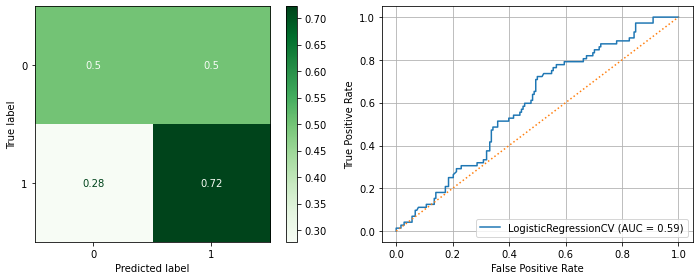

Training Score = 0.67
Test Score = 0.72


In [124]:
ji.evaluate_classification(logregCV,X_test_reg,y_test,  
                           X_train=X_train_reg_smote,y_train=y_train_reg_smote,
                           label='Logistic Regression CV')

------------------------------------------------------------
	CLASSIFICATION REPORT - LinearSVC
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       178
           1       0.41      0.46      0.43        72

    accuracy                           0.65       250
   macro avg       0.59      0.59      0.59       250
weighted avg       0.67      0.65      0.66       250



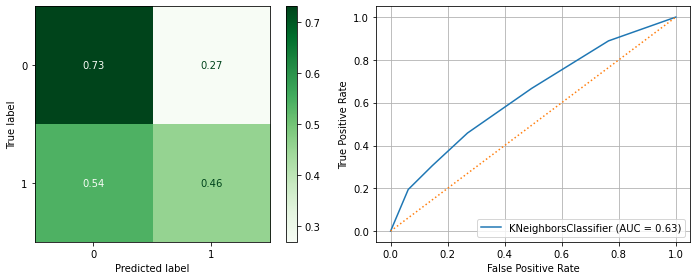

Training Score = 0.83
Test Score = 0.65


In [125]:
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier()
clf.fit(X_train_reg_smote,y_train_reg_smote)

ji.evaluate_classification(clf,X_test_reg,y_test,
                           X_train=X_train_reg_smote,y_train=y_train_reg_smote,
                           label='LinearSVC');
# plt.show()

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.3s finished


{'n_neighbors': 3, 'p': 1}
0.7477521867765771
------------------------------------------------------------
	CLASSIFICATION REPORT - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       178
           1       0.41      0.47      0.44        72

    accuracy                           0.65       250
   macro avg       0.59      0.60      0.59       250
weighted avg       0.67      0.65      0.66       250



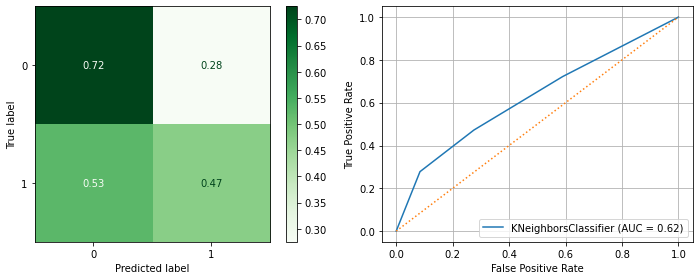

Training Score = 0.87
Test Score = 0.65


In [126]:
params = {'n_neighbors':[3,4,5,7],
          'p':[1,2]
         }

clf = KNeighborsClassifier()


grid = GridSearchCV(clf,params,scoring='f1', cv=3,
                    n_jobs=-1,verbose=True)
grid.fit(X_train_reg_smote,y_train_reg_smote)


print(grid.best_params_)
print(grid.best_score_)
ji.evaluate_classification(grid.best_estimator_,X_test_reg,y_test,
                           X_train=X_train_reg_smote,y_train=y_train_reg_smote)

In [127]:
# def get_coeffs(logregCV, X_train_smote,):
#     coeffs = pd.Series(logregCV.coef_[0],index=X_train_smote.columns)
#     coeffs['Intercept'] = logregCV.intercept_
#     coeffs = coeffs.astype(float)
#     return coeffs

# coeffs = get_coeffs(logregCV,X_train_smote)
# coeffs.sort_values().plot(kind='barh',figsize=(5,10))

In [128]:
# logregCV.C_, logregCV.

### Catboost

In [129]:
X_train_tf.astype(int)

age_at_release  max_sentence  sex  target_population  felony  ...  offense_subtype_Theft  offense_subtype_Traffic  offense_subtype_Trafficking  offense_subtype_Vandalism  offense_subtype_Weapons
286              50            10    1                  1       1  ...                      0                        0                            0                          0                        0
71               30             2    1                  0       0  ...                      0                        0                            0                          1                        0
86               30             2    1                  0       0  ...                      1                        0                            0                          0                        0
17               40             5    0                  1       1  ...                      1                        0                            0                          0                        0
498              50             2    1                  1       0  ...                      0                        1                            0                          0                        0
..              ...           ...  ...                ...     ...  ...                    ...                      ...                          ...                        ...                      ...
527              40             5    1                  0       1  ...                      1                        0                            0                          0                        0
176              40             2    1                  1       0  ...                      0                        0                            0                          0                        0
368              40             5    1                  0       1  ...                      0                        0                            0                          0                        0
211              50            10    1                  1       1  ...                      0                        0                            0                          0                        0
710              40             2    1                  0       0  ...                      1                        0                            0                          0                        0

[750 rows x 60 columns]

In [130]:
# Import catboost Pool to create training and testing pools
from catboost import Pool, CatBoostClassifier

# train_pool =  Pool(data=X_train_tf.astype(int), label=y_train, cat_features=[int(i) for i in cat_col_index])
# test_pool = Pool(data=X_test_tf.astype(int), label=y_test,  cat_features=[int(i) for i in cat_col_index])

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

------------------------------------------------------------
	CLASSIFICATION REPORT - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.74      0.75       178
           1       0.41      0.46      0.43        72

    accuracy                           0.66       250
   macro avg       0.59      0.60      0.59       250
weighted avg       0.67      0.66      0.66       250



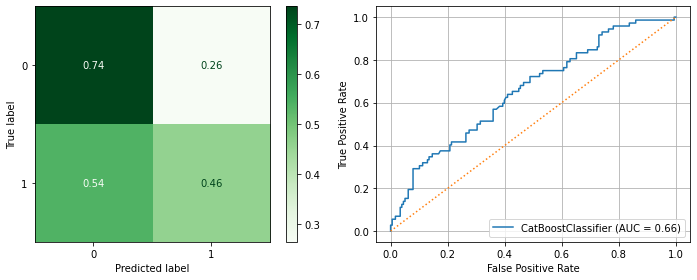

Training Score = 0.77
Test Score = 0.66


In [131]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(
    iterations=2000,#depth=12,
    boosting_type='Ordered',
    learning_rate=0.001,
    thread_count=-1,
    eval_metric='Recall',
    silent=True,
    allow_const_label=True
)#,|
cb_base.fit(X_train_reg_smote, y_train_reg_smote, plot=True, early_stopping_rounds=50)
cb_base.best_score_

ji.evaluate_classification(cb_base,X_test_reg,y_test, 
                          X_train=X_train_reg_smote,y_train=y_train_reg_smote)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

------------------------------------------------------------
	CLASSIFICATION REPORT - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       178
           1       0.53      0.42      0.47        72

    accuracy                           0.72       250
   macro avg       0.65      0.63      0.64       250
weighted avg       0.71      0.72      0.71       250



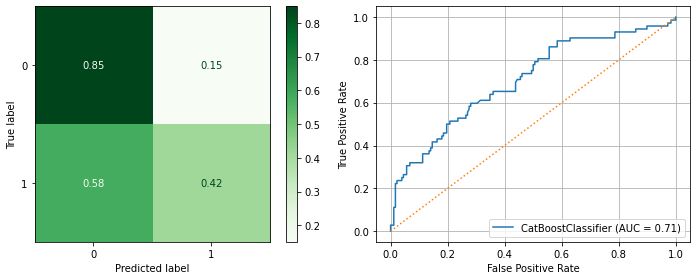

Training Score = 0.91
Test Score = 0.72


In [132]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(iterations=1000, depth=14,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                             silent=True,
                            allow_const_label=True
)#,
cb_base.fit(X_train_reg_smote, y_train_reg_smote, plot=True, early_stopping_rounds=30)
cb_base.best_score_

ji.evaluate_classification(cb_base,X_test_reg,y_test, 
                          X_train=X_train_reg_smote,y_train=y_train_reg_smote)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

------------------------------------------------------------
	CLASSIFICATION REPORT - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       178
           1       0.54      0.42      0.47        72

    accuracy                           0.73       250
   macro avg       0.66      0.64      0.64       250
weighted avg       0.71      0.73      0.72       250



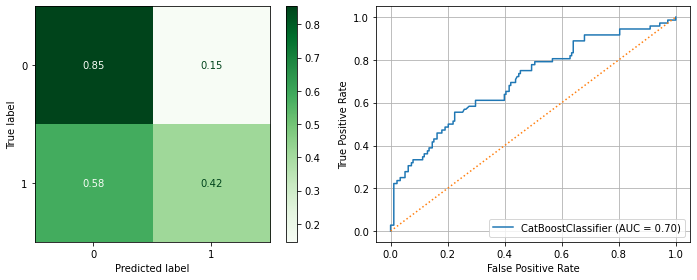

Training Score = 0.91
Test Score = 0.73


In [133]:
# Instantiating CatBoostClassifier 
cb_base = CatBoostClassifier(iterations=3000, depth=14,
                            boosting_type='Ordered',
                            learning_rate=0.01,
                            thread_count=-1,
                            eval_metric='AUC',
                             silent=True,
                            allow_const_label=True
)#,
cb_base.fit(X_train_reg_smote, y_train_reg_smote, plot=True, early_stopping_rounds=30)
cb_base.best_score_

ji.evaluate_classification(cb_base,X_test_reg,y_test, 
                          X_train=X_train_reg_smote,y_train=y_train_reg_smote)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

{'learn': {'Logloss': 0.3015853357868687}}
------------------------------------------------------------
	CLASSIFICATION REPORT - Test Data
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       178
           1       0.46      0.43      0.44        72

    accuracy                           0.69       250
   macro avg       0.62      0.61      0.61       250
weighted avg       0.68      0.69      0.69       250



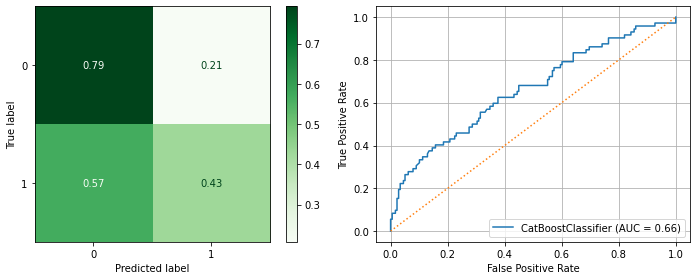

Training Score = 0.89
Test Score = 0.69


In [144]:
# Instantiating CatBoostClassifier 
#,
                        
cb_orig = CatBoostClassifier(iterations=3000, depth=4,
                            boosting_type='Ordered',
                            learning_rate=0.03,
                            thread_count=-1,
                            eval_metric='AUC',
                            allow_const_label=True,
                           silent=True)
cb_orig.fit(X_train_reg_smote, y_train_reg_smote, plot=True, early_stopping_rounds=30)
print(cb_orig.best_score_)

ji.evaluate_classification(cb_orig,X_test_reg,y_test, 
                          X_train=X_train_reg_smote,y_train=y_train_reg_smote)

# CONCLUSIONS
- **After adjusting for imbalanced classes, the most important factor for determining recidivism are:**
    - **Age at Release**
    - **Supervising Judicial District**
    - **Release Type**
    - **Crime Subtype**
    
    
## Recommendatons
- This model could be used to predict which prisoners due for release may at the greatest risk for recidivism.<br><br>
    - Using this knowledge, the state of Iowa could put new programs into action that target those at high risk for recidivism and provide additional assistance and guidance following release.<br><br>
    - Additionally, there could be additional counseling or education _prior_ to release to supply the inmate with tools and options to avoid returning to a life of crime.
    
# FUTURE DIRECTIONS
- With more time and reliable performance, would perform cross-validation of our final model.<br><br>
- Additional visuals summarizing the underlying features effects on recidivism.<br><br>
- Adapting more available visualization tools to better display the underpinning of the model.
<br><br>
- Exploration of the predictability of crimes types committed by recidivists.

### POST-REVIEW SUGGESTIONS / IDEAS:
- [ ] Try using reduction instead of SMOTE.
- [ ] seaborn catplot bar graphs
- [ ] Add tree or other visuals
    - Try Mike's SHAP plots

# APPENDIX

## Bookmark: saving gridsearch
https://stackabuse.com/scikit-learn-save-and-restore-models/

In [136]:
## Make a folder for saving models
import os
mpath = './models/'
os.makedirs(mpath,exist_ok=True)

In [137]:
import joblib
## Save Grid
joblib_file = mpath+'rf_gridsearch_recall_macro.pkl'
joblib.dump(grid,joblib_file,compress=3)

['./models/rf_gridsearch_recall_macro.pkl']

In [138]:
grid_loaded = joblib.load(joblib_file)
grid_loaded.best_params_

{'n_neighbors': 3, 'p': 1}

In [139]:
# STOP

# from bs_ds import viz_tree

# viz_tree(cb_clf)



# compare_tree = sklearn.tree.DecisionTreeClassifier()
# dir(compare_tree)

# compare_tree.fit(X_train, y_train)

# dir(compare_tree)

# # This is the tree object that sklearn generates and is looking for 
# help(compare_tree.tree_)

# dir(cb_clf)

# help(cb_clf.get_metadata())

# test = cb_clf.get_metadata()

# help(cb_clf)

# SHAP 

### SHAP values
https://github.com/jirvingphd/shap


# Using SHAP and Shapely Values for Model Interpretation




- White Paper on Shapely Values:
    - https://arxiv.org/abs/1705.07874
    
- Blog Posts:
    - https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

    - https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a


- Videos/Talks:
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
    

## Using SHAP

- Uses game theory to explain feature importance and how a feature steered a model's prediction(s) by removing each feature and seeing the effect on the error.

- SHAP has:
    - `TreeExplainer`:
        - compatible with sckit learn, xgboost, Catboost
    - `KernelExplainer`:
        - compatible with "any" model
        


- See [this blog post](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) for intro to topic and how to use with trees

- For non-tree/random forest models [see this follow up post]( https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

        

### To Get Expanations for Trees:



- Import and initialize javascript:

```python
import shap 
shap.initjs()
```
1. Create a shap explainer using your fit model.

```python
explainer = shap.TreeExplainer(xgb_clf)
```

2. Get shapely values from explainer for your training data

```python
shap_values = explainer.shap_values(X_train,y_train)
```            

3. Select which type of the available plots you'd like to visualize

    
- **Types of Plots:**
    - `summary_plot()`
    - `dependence_plot()`
    - `force_plot()` for a given observation
    - `force_plot()` for all data

### Summary Plot

```python

## For normal bar graph of importance:
shap.summary_plot(shap_values,X_train,plot_type='bar')

## For detail Shapely value visuals:
shap.summary_plot(shap_values, X_train)
```

**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


**`shap.dependence_plot`**


```python
## To Auto-Select Feature Most correlated with a specific feature, just pass the desired feature's column name.

shap.dependence_plot('super_dist', shap_values, X_train)

## There is a way to specifically call out multiple features but I wasn't able to summarize it quickly for this nb
```

`shap.force_plot`

To show an individual data point's prediction and the factors pushing it towards one class or another

```python
## Just using np to randomly select a row

row = np.random.choice(range(len(X_train))
                       
shap.force_plot(explainer.expected_value, shap_values[row,:], X_train.iloc[row,:])
```

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

   Non Recid       0.78      0.70      0.74       178
   Recidivst       0.40      0.50      0.45        72

    accuracy                           0.64       250
   macro avg       0.59      0.60      0.59       250
weighted avg       0.67      0.64      0.65       250

------------------------------------------------------------




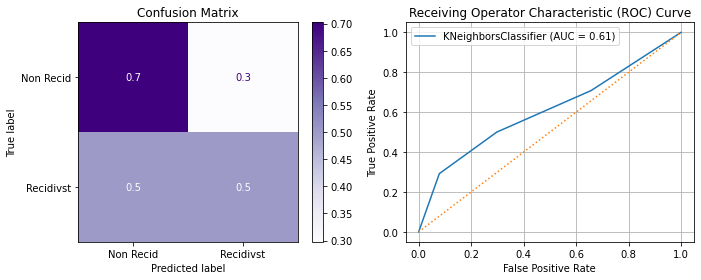

In [140]:
clf = grid.best_estimator_

evaluate_classification(clf, X_test_tf,y_test)

In [141]:
# %conda list shap

# !pip install -U shap

# %conda uninstall shap

In [142]:
import shap
shap.initjs()

ModuleNotFoundError: No module named 'shap'

In [ ]:
shap.__version__

In [ ]:
X_shap = shap.sample(X_test_tf)
X_shap

In [ ]:
# plt.style.use('seaborn-notebook')

In [ ]:
explainer = shap.TreeExplainer(clf)

In [ ]:
shap_vals = explainer.shap_values(X_shap)

In [ ]:
shap_ixn_vals = explainer.shap_interaction_values(X_shap)

In [ ]:

shap.summary_plot(shap_vals, X_shap,plot_type='dot')

In [ ]:
shap.force_plot(explainer.expected_value, X_shap[:1000],X_train[:1000])

In [ ]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")